# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [1]:
### Ваш код здесь ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# обучение модели
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
# метрики
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.metrics import r2_score


## Задание 2

Считайте данные и посмотрите на несколько строк.

In [2]:
### Ваш код здесь ###
data = pd.read_csv('data.csv')
data

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,...,Y,1647,153.011241,3,TA,460,42.735380,8/2007,Normal,175000
1456,13175,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,...,Y,2073,192.587919,2,TA,500,46.451500,2/2010,Normal,210000
1457,9042,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,...,Y,2340,217.393020,2,Gd,252,23.411556,5/2010,Normal,266500
1458,9717,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,...,Y,1078,100.149434,1,Gd,240,22.296720,4/2010,Normal,142125


In [3]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotArea_M      1460 non-null   float64
 2   Street         1460 non-null   object 
 3   BldgType       1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   object 
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  TotalBsmtSF    1460 non-null   int64  
 13  TotalBsmtSF_M  1460 non-null   float64
 14  Heating        1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  GrLivArea      1460 non-null   int64  
 18  GrLivAre

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [4]:
### Ваш код здесь ###
data.select_dtypes(include=['int64', 'float64']).describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

In [5]:
### Ваш код здесь ###
# Пары признаков для анализа
columns_to_drop = ['LotArea_M', 'TotalBsmtSF_M', 'GrLivArea_M', 'GarageArea_M']
data.drop(columns=columns_to_drop, inplace=True)

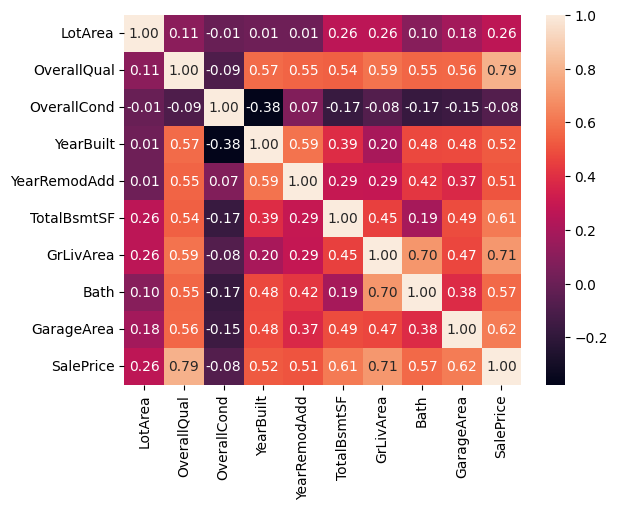

In [6]:
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [7]:
print("Колонки отсартированные по корреляции с целевой переменной SalePrice")
corr_matrix['SalePrice'].apply(lambda x: abs(x)).sort_values(ascending=False)

Колонки отсартированные по корреляции с целевой переменной SalePrice


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
Bath            0.568267
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
OverallCond     0.077856
Name: SalePrice, dtype: float64

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

In [8]:
### Ваш код здесь ###
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
half_col_count = int(len(numeric_columns)/2)
part1 = numeric_columns[:half_col_count]
part2 = numeric_columns[half_col_count:]
print("Разделили названия колонок на две группы для удобства визуализации")

Разделили названия колонок на две группы для удобства визуализации


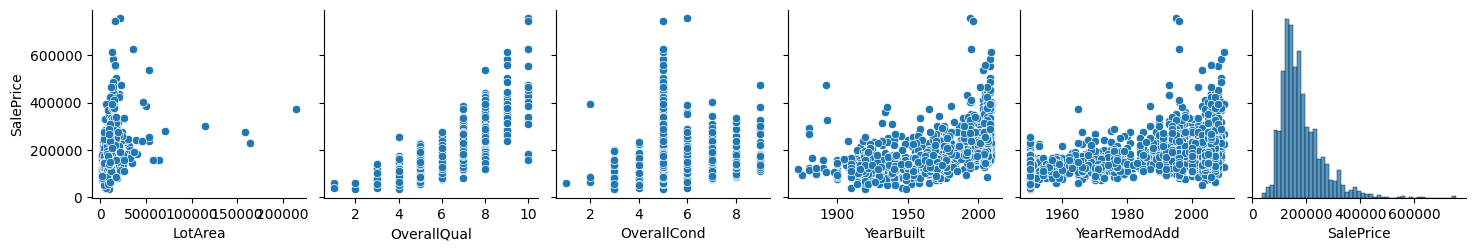

In [9]:
sns.pairplot(data[part1+['SalePrice']], y_vars="SalePrice")


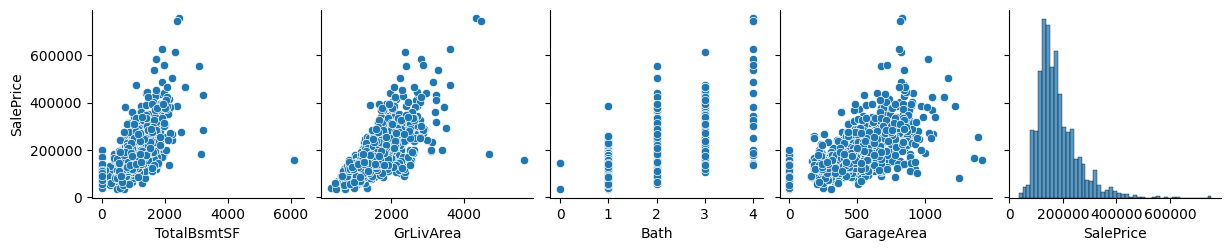

In [10]:
sns.pairplot(data[part2], y_vars="SalePrice")

In [11]:
print("Колонки отсартированные по корреляции с целевой переменной SalePrice")
corr_matrix['SalePrice'].sort_values(ascending=False)

Колонки отсартированные по корреляции с целевой переменной SalePrice


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
Bath            0.568267
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
OverallCond    -0.077856
Name: SalePrice, dtype: float64

Категориальные признаки:

In [12]:
object_columns = data.select_dtypes(include=['object']).columns.to_list()
categorical_columns = []
for col in object_columns:
    print(f"В {col} уникальных значений: {data[col].nunique()}")
    if data[col].nunique() < 10:
        categorical_columns.append(col)

В Street уникальных значений: 2
В BldgType уникальных значений: 5
В RoofStyle уникальных значений: 6
В ExterQual уникальных значений: 4
В ExterCond уникальных значений: 5
В Foundation уникальных значений: 6
В Heating уникальных значений: 6
В HeatingQC уникальных значений: 5
В CentralAir уникальных значений: 2
В KitchenQual уникальных значений: 4
В DateSold уникальных значений: 55
В SaleCondition уникальных значений: 6


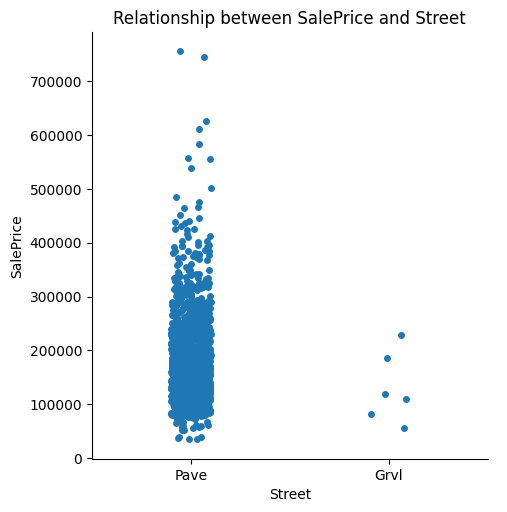

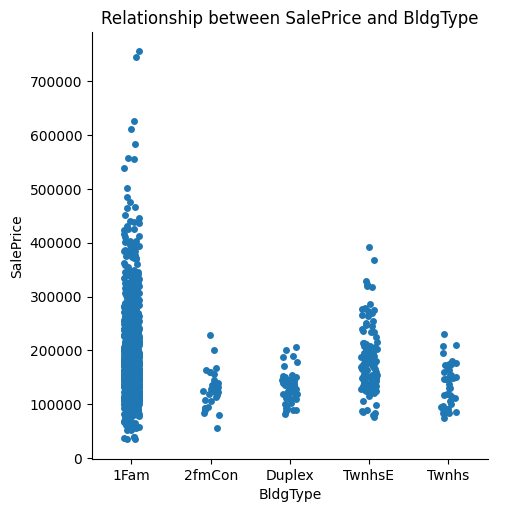

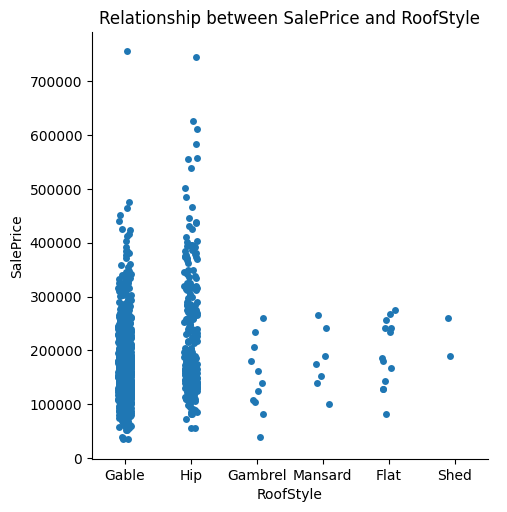

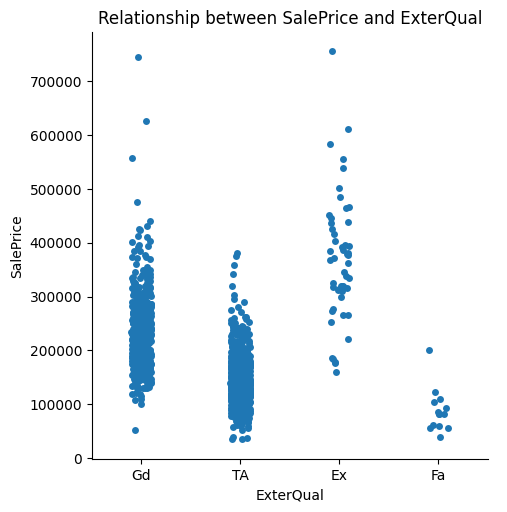

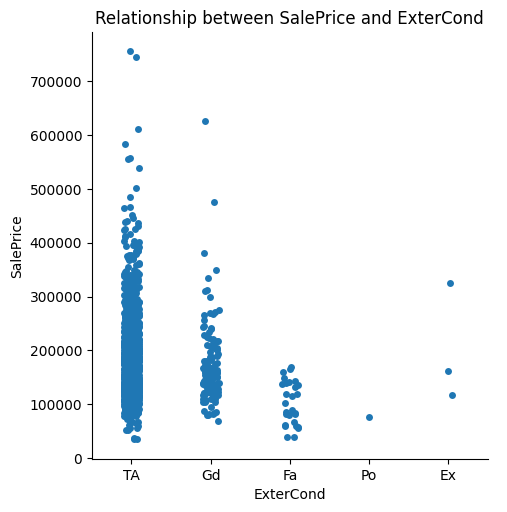

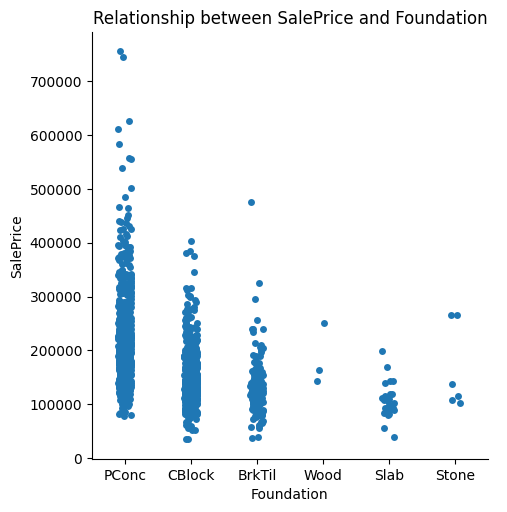

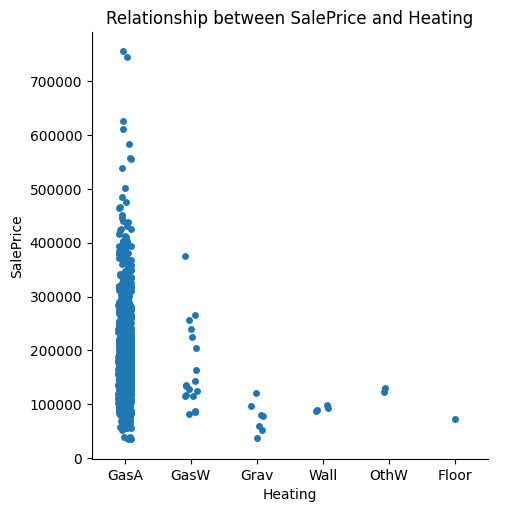

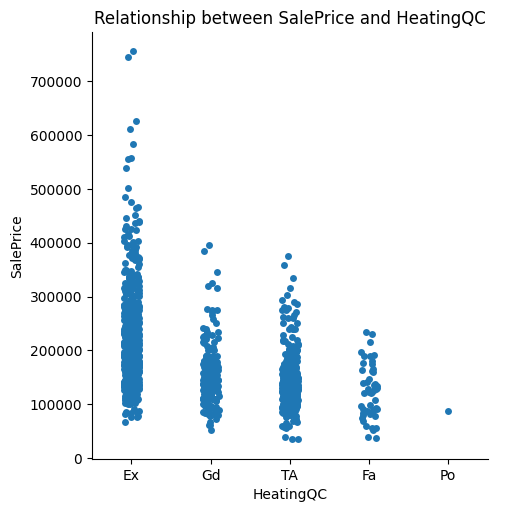

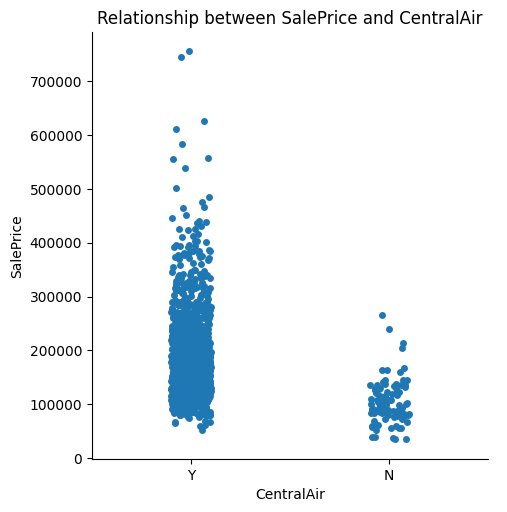

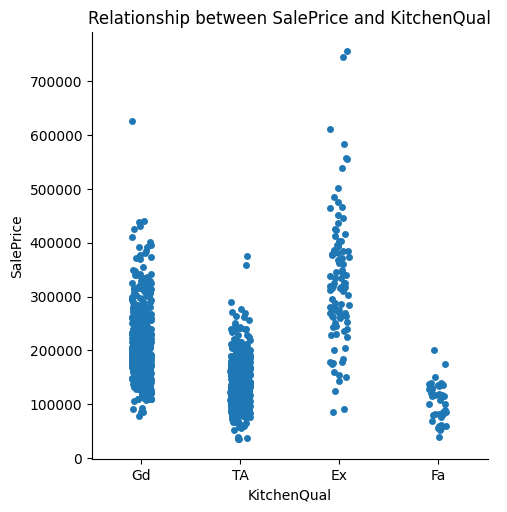

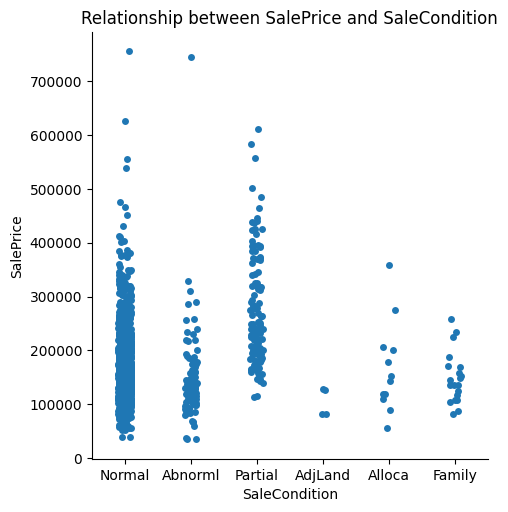

In [13]:
for col in categorical_columns:
    sns.catplot(x=col, y='SalePrice', data=data, kind='strip')
    plt.title(f'Relationship between SalePrice and {col}')
    plt.show()


4. Сделайте предварительные выводы.

##### Чистка данных от выбросов

0.04726027397260274% записей в колонке LotArea удаляем
0.0013698630136986301% записей в колонке OverallQual удаляем
0.08561643835616438% записей в колонке OverallCond удаляем
0.004794520547945206% записей в колонке YearBuilt удаляем
0.0% записей в колонке YearRemodAdd удаляем
0.04178082191780822% записей в колонке TotalBsmtSF удаляем
0.021232876712328767% записей в колонке GrLivArea удаляем
0.0% записей в колонке Bath удаляем
0.014383561643835616% записей в колонке GarageArea удаляем
0.04178082191780822% записей в колонке SalePrice удаляем
with visualization parameter: 'SaleCondition'


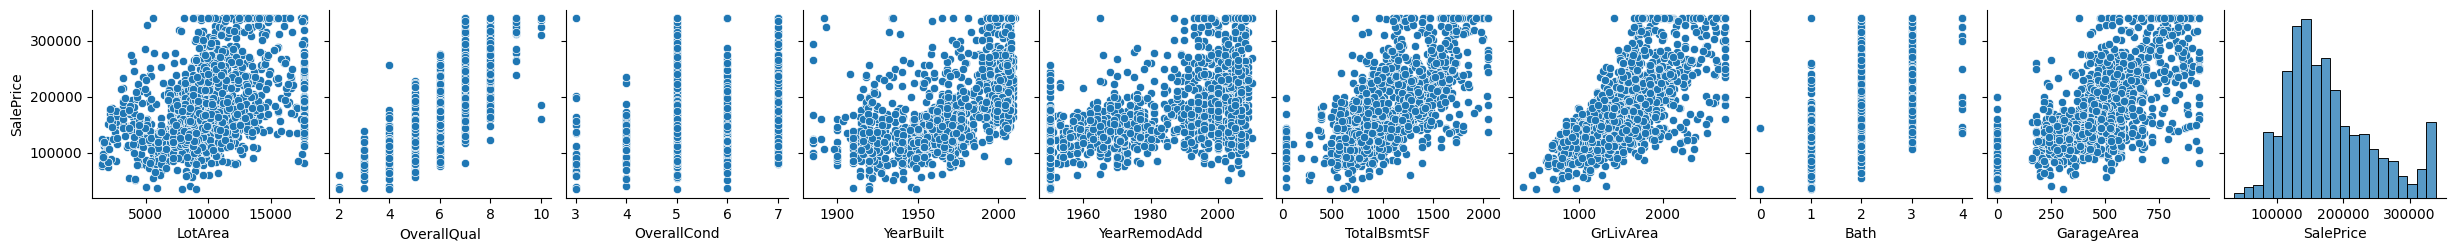

In [14]:
def otliers_cleaning(df, col):
    def calculate_outliers(data):
        q25 = data.quantile(0.25)
        q75 = data.quantile(0.75)
        iqr = q75 - q25
        
        boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
        return boundaries
    
        
    boundaries = calculate_outliers(df[col])
    #Подсчитать количество значений, которые больше верхней границы или меньше нижней границы
    is_outlier = (df[col] < boundaries[0]) | (df[col] > boundaries[1])
    
    is_outlier.sum()
    
    print(f"{is_outlier.sum() / len(df)}% записей в колонке {col} удаляем") # процент выбросов относительно общего количества записей в датасете

    # df = df[(df[col] < boundaries[1]) & (df[col] > boundaries[0])]
    df.loc[df[col] > boundaries[1], col] = int(boundaries[1])  
    df.loc[df[col] < boundaries[0], col] = int(boundaries[0])
    #которые были больше верхней границы или меньше нижней границы boundaries, заменили на граничные значения
    return df

columns_list = data.select_dtypes(exclude=['object']).columns.to_list()

for colname in columns_list:
    otliers_cleaning(data, colname)

sns.pairplot(data,  y_vars="SalePrice")
print("with visualization parameter: 'SaleCondition'")
plt.show()

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

#### Новые переменные
 1. Создадим переменную общей площади недвижемости, т.е. сумма всех показателей площади.
 2. Создадим YearSold из DateSold, после чего можно удалить DateSold
 3. У нас есть 3 даты (дата постройки, дата реконструкции, дата последней продажи), надо проверить как влияет количество прошедших лет от каждой из дат.
 4. Добавить полинамиальные фитчи с помощью PolynomialFeatures (возведения в степень, перемножения)


После опытов, решил попробовать создать полиномиальные признаки в ручную, выбрав колонки на основе матрицы корреляции.\n
Выбираю наименьшим показателем линейной зависимости от целевой переменной.

In [15]:
# # 1.
# data['total_area'] = data['LotArea']+data['TotalBsmtSF']+data['GrLivArea']+data['GarageArea'] # Данные мешают предсказанию
# # # 2.
data['YearSold'] = data['DateSold'].apply(lambda x: int(x[x.index('/')+1:]))
# # # 3.
# data['built_age'] = data['YearBuilt'].apply(lambda x: datetime.now().year - x)
# data['remod_age'] = data['YearRemodAdd'].apply(lambda x: datetime.now().year - x)
# data['sold_age'] = data['YearSold'].apply(lambda x: datetime.now().year - x)
# data

In [16]:
# sns.pairplot(data[['built_age', 'remod_age', 'sold_age', 'total_area', 'YearSold']+['SalePrice']], y_vars="SalePrice")
# С созданными переменными не наблюдается прямой зависимости с целевой

In [17]:
data.drop(columns=['DateSold'], inplace=True)
print("Удалили колонку DateSold")

Удалили колонку DateSold


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1460 non-null   int64 
 1   Street         1460 non-null   object
 2   BldgType       1460 non-null   object
 3   OverallQual    1460 non-null   int64 
 4   OverallCond    1460 non-null   int64 
 5   YearBuilt      1460 non-null   int64 
 6   YearRemodAdd   1460 non-null   int64 
 7   RoofStyle      1460 non-null   object
 8   ExterQual      1460 non-null   object
 9   ExterCond      1460 non-null   object
 10  Foundation     1460 non-null   object
 11  TotalBsmtSF    1460 non-null   int64 
 12  Heating        1460 non-null   object
 13  HeatingQC      1460 non-null   object
 14  CentralAir     1460 non-null   object
 15  GrLivArea      1460 non-null   int64 
 16  Bath           1460 non-null   int64 
 17  KitchenQual    1460 non-null   object
 18  GarageArea     1460 non-null

In [19]:
#4 PolynomialFeatures

In [20]:
# ['YearBuilt', 'OverallCond', 'LotArea']
columns_to_polym = data.select_dtypes(include=['int64', 'float64']).drop(columns=['SalePrice']).columns.to_list()
# делим датафрейм на фичи и целевую переменную
X = data[columns_to_polym]  # фичи

# прогоняем через PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# создадим новый датафрейм с полиномиальными фичами
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
X_poly_df.drop(columns=['1']+columns_to_polym, inplace=True)
# добавим обратно 
data = pd.concat([X_poly_df.reset_index(drop=True), data.reset_index(drop=True)], axis=1)
data.info()
# data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 297 entries, LotArea^2 to YearSold
dtypes: float64(275), int64(11), object(11)
memory usage: 3.3+ MB


После опытов, решил попробовать создать Полиномиальные признаки, выбрав колонки на основе матрицы корреляции. Выбираю наименьшим показателем линейной зависимости от целевой переменной.

In [21]:
# columns_to_polym = ['LotArea', 'OverallCond']
# for col in columns_to_polym:
#     # data['log_'+col] = data[col].apply(lambda x: np.log10(x))
#     # data['power2_'+col] = data[col].apply(lambda x: np.power(x, 2))
#     data['power3_'+col] = data[col].apply(lambda x: np.power(x, 3))

# Закоментировал варианты влияющие отрицательно либо менее продуктивно.

## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [22]:
data.info()
categorical_columns = data.select_dtypes(exclude=['int64', 'float64']).columns.to_list()
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
print(categorical_columns, numeric_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 297 entries, LotArea^2 to YearSold
dtypes: float64(275), int64(11), object(11)
memory usage: 3.3+ MB
['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'SaleCondition'] ['LotArea^2', 'LotArea OverallQual', 'LotArea OverallCond', 'LotArea YearBuilt', 'LotArea YearRemodAdd', 'LotArea TotalBsmtSF', 'LotArea GrLivArea', 'LotArea Bath', 'LotArea GarageArea', 'LotArea YearSold', 'OverallQual^2', 'OverallQual OverallCond', 'OverallQual YearBuilt', 'OverallQual YearRemodAdd', 'OverallQual TotalBsmtSF', 'OverallQual GrLivArea', 'OverallQual Bath', 'OverallQual GarageArea', 'OverallQual YearSold', 'OverallCond^2', 'OverallCond YearBuilt', 'OverallCond YearRemodAdd', 'OverallCond TotalBsmtSF', 'OverallCond GrLivArea', 'OverallCond Bath', 'OverallCond GarageArea', 'OverallCond YearSold', 'YearBuilt^2', 'YearBuilt YearRemodAdd', 'YearBuilt 

In [23]:
### Ваш код здесь ###
data_train, data_test = train_test_split(data, test_size=0.2, random_state=27)
print(data_train.shape)
print(data_test.shape)

# print(data_train.info())
# data_test.info()
# data_test[categorical_columns]

(1168, 297)
(292, 297)


In [24]:


# Инициализация OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary' )

# Преобразование категориальных данных в train
train_encoded = encoder.fit_transform(data_train[categorical_columns])

# Получение новых названий колонок после OneHotEncoding
encoded_columns = encoder.get_feature_names_out(categorical_columns)

# Создание DataFrame с закодированными данными для train
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_columns, index=data_train.index)

# Удаление старых категориальных колонок и добавление новых закодированных колонок
data_train = data_train.drop(categorical_columns, axis=1)
data_train = pd.concat([data_train, train_encoded_df], axis=1)

# Преобразование категориальных данных в test
test_encoded = encoder.transform(data_test[categorical_columns])

# Создание DataFrame с закодированными данными для test
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_columns, index=data_test.index)

# Удаление старых категориальных колонок и добавление новых закодированных колонок
data_test = data_test.drop(categorical_columns, axis=1)
data_test = pd.concat([data_test, test_encoded_df], axis=1)

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [25]:
print(data_train.shape)
print(data_test.shape)


(1168, 335)
(292, 335)


3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [26]:
print(categorical_columns)

['Street', 'BldgType', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'SaleCondition']


In [27]:
### Ваш код здесь ###
print(data_train.shape)
print(data_test.shape)

def standartization_numeric_data_in_df(df, numeric_columns):
    
    # Исключаем целевую переменную из списка числовых колонок
    numeric_columns = df[numeric_columns].drop(columns=['SalePrice']).columns.to_list()
    
    # Инициализируем MinMaxScaler
    mm_scaler = StandardScaler()
    
    # Обучаем и трансформируем числовые данные
    mm_matrix_train = mm_scaler.fit_transform(df[numeric_columns])
    
    # Создаем новые имена для стандартизированных колонок
    new_col_names = ['std_' + col for col in numeric_columns]    
    # Создаем новый датафрейм со стандартизированными данными
    new_data = pd.DataFrame(data=mm_matrix_train, columns=new_col_names, index=df.index)    
    # Объединяем новый датафрейм с исходным
    df = pd.concat([df, new_data], axis=1)    
    # Удаляем оригинальные числовые колонки
    df.drop(columns=numeric_columns, inplace=True)
    
    return df
    
rdy_data_train = standartization_numeric_data_in_df(data_train, numeric_columns)

rdy_data_test = standartization_numeric_data_in_df(data_test, numeric_columns)

print(rdy_data_train.info())
print(rdy_data_test.info())


(1168, 335)
(292, 335)
<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 1128 to 1043
Columns: 335 entries, SalePrice to std_YearSold
dtypes: float64(334), int64(1)
memory usage: 3.0 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 2 to 1356
Columns: 335 entries, SalePrice to std_YearSold
dtypes: float64(334), int64(1)
memory usage: 766.5 KB
None


In [28]:
rdy_data_test
# rdy_data_train

,SalePrice,Street_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,...,std_LotArea,std_OverallQual,std_OverallCond,std_YearBuilt,std_YearRemodAdd,std_TotalBsmtSF,std_GrLivArea,std_Bath,std_GarageArea,std_YearSold
2,223500,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.487500,0.716606,-0.551762,1.007563,0.831915,-0.348812,0.726696,1.497950,0.743084,0.156454
105,250000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.021164,1.461264,-0.551762,1.072921,0.929728,0.000063,1.181643,1.497950,0.935204,0.156454
679,128500,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133470,-0.772710,-0.551762,-0.299594,-1.173256,-0.170440,-1.035671,-1.129085,0.570176,-0.604955
71,129500,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.502970,-1.517368,0.494436,0.386663,1.027541,-0.545545,-1.351484,-1.129085,-0.448061,-0.604955
926,285000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.690694,1.461264,-0.551762,1.072921,0.929728,0.335822,2.025282,1.497950,0.973628,-0.604955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,117000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.123947,-0.028052,1.540635,-1.966219,0.880821,-1.489867,0.393215,-1.129085,-0.952377,-1.366364
362,198500,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.583814,0.716606,-0.551762,1.072921,0.880821,-2.651907,1.027049,1.497950,1.050476,0.917863
306,225000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.090843,0.716606,-0.551762,0.648095,0.293942,-0.925897,1.735972,1.497950,1.405899,-0.604955
1200,116050,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.027132,-1.517368,-0.551762,-0.005484,-0.733096,-0.495706,-1.309523,-1.129085,-0.832302,-1.366364


## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [29]:
### Ваш код здесь ###
fitches_train = rdy_data_train.drop(columns=['SalePrice'])
target_train = rdy_data_train['SalePrice']

fitches_test = rdy_data_test.drop(columns=['SalePrice'])
target_test = rdy_data_test['SalePrice']

lnr_reg = LinearRegression()

lnr_reg.fit(fitches_train, target_train)
fitches_test
train_predict = lnr_reg.predict(fitches_train)
test_predict = lnr_reg.predict(fitches_test)

In [30]:
mse_train = mean_squared_error(target_train, train_predict)
mse_test = mean_squared_error(target_test, test_predict)

mae_train = mean_absolute_error(target_train, train_predict)
mae_test = mean_absolute_error(target_test, test_predict)

r2_train = r2_score(target_train, train_predict)
r2_test = r2_score(target_test, test_predict)

print("MSE:")
print(f'MSE (train): {mse_train}')
print(f'MSE (test): {mse_test}')

print("\nMAE:")
print(f'MAE (train): {mae_train}')
print(f'MAE (test): {mae_test}')

print("\nR**2:")
print(f'R**2 (train): {r2_train}')
print(f'R**2 (test): {r2_test}')

MSE:
MSE (train): 306492501.5267717
MSE (test): 11599628207531.432

MAE:
MAE (train): 12651.1850158337
MAE (test): 2823180.150328184

R**2:
R**2 (train): 0.933164893759742
R**2 (test): -2758.958908398198


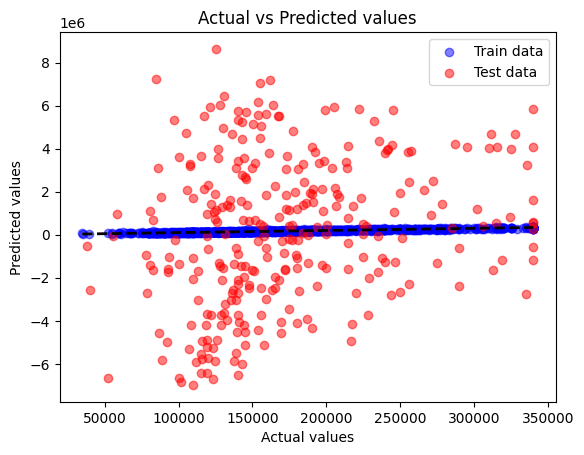

In [31]:
# График для тренировочных данных
# print(type(prediction_test))
# prediction_test = np.clip(prediction_test, np.min(prediction_train), np.max(prediction_train))

plt.scatter(target_train, train_predict, color='blue', label='Train data', alpha=0.5)
# График для тестовых данных
plt.scatter(target_test, test_predict, color='red', label='Test data', alpha=0.5)

# Линия идеальных предсказаний
plt.plot([min(target_train.min(), target_test.min()), max(target_train.max(), target_test.max())], 
         [min(target_train.min(), target_test.min()), max(target_train.max(), target_test.max())], 
         'k--', lw=2)

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

In [32]:
# Получение признаков и их коэффициентов
features = fitches_train.columns
coefficients = lnr_reg.coef_

# Создание DataFrame для удобного вывода
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
pd.set_option('display.float_format', lambda x: '%.5f' % x)

feature_importance.sort_values(by=['Coefficient'], ascending=False)

,Feature,Coefficient
82,std_YearBuilt YearSold,13640901334.59464
75,std_OverallCond YearSold,11160566066.72554
103,std_YearSold^2,11122845981.44711
93,std_TotalBsmtSF YearSold,9584264985.42622
324,std_LotArea,9043509160.81340
...,...,...
333,std_YearSold,-5781397592.11293
327,std_YearBuilt,-6748695097.54066
267,std_YearBuilt YearSold^2,-6890299239.97263
67,std_OverallQual YearSold,-13903215553.37538


2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [33]:
# stop()

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Диапазон значений alpha для поиска
alphas = np.logspace(-4, 150, 50)
alphas = np.arange(10, 400, 30)

# Создание модели Lasso
lasso = Lasso(random_state=42)
print(alphas)
# Создание словаря параметров для поиска
param_grid = {'alpha': alphas}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=2, scoring=make_scorer(mean_squared_error, greater_is_better=False), n_jobs=-1)

# Обучение
grid_search.fit(fitches_train, target_train)

# получим оптимального значения alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Оптимальное значение alpha: {best_alpha}")

# Предикты
train_predict = grid_search.predict(fitches_train)
test_predict = grid_search.predict(fitches_test)

# Метрики:
mse_train = mean_squared_error(target_train, train_predict)
mse_test = mean_squared_error(target_test, test_predict)

mae_train = mean_absolute_error(target_train, train_predict)
mae_test = mean_absolute_error(target_test, test_predict)

r2_train = r2_score(target_train, train_predict)
r2_test = r2_score(target_test, test_predict)

# Вывод метрик
print("MSE:")
print(f'MSE (train): {mse_train}')
print(f'MSE (test): {mse_test}')

print("\nMAE:")
print(f'MAE (train): {mae_train}')
print(f'MAE (test): {mae_test}')

print("\nR^2:")
print(f'R^2 (train): {r2_train}')
print(f'R^2 (test): {r2_test}')

[ 10  40  70 100 130 160 190 220 250 280 310 340 370]


/Users/saidplatonov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.133e+10, tolerance: 2.575e+08
  model = cd_fast.enet_coordinate_descent(
/Users/saidplatonov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+10, tolerance: 2.781e+08
  model = cd_fast.enet_coordinate_descent(
/Users/saidplatonov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Оптимальное значение alpha: 160
MSE:
MSE (train): 501971886.83493274
MSE (test): 568691995.1133761

MAE:
MAE (train): 15294.33847456621
MAE (test): 17559.75716242384

R^2:
R^2 (train): 0.8905377971104947
R^2 (test): 0.8646882029349169


/Users/saidplatonov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.029e+09, tolerance: 5.356e+08
  model = cd_fast.enet_coordinate_descent(


In [35]:
### Ваш код здесь ###
linereg_lasso = Lasso(alpha=160, random_state=42)

linereg_lasso.fit(fitches_train, target_train)

train_predict = linereg_lasso.predict(fitches_train)
test_predict = linereg_lasso.predict(fitches_test)

mse_train = mean_squared_error(target_train, train_predict)
mse_test = mean_squared_error(target_test, test_predict)

mae_train = mean_absolute_error(target_train, train_predict)
mae_test = mean_absolute_error(target_test, test_predict)

r2_train = r2_score(target_train, train_predict)
r2_test = r2_score(target_test, test_predict)

# Вывод метрик
print("MSE:")
print(f'MSE (train): {mse_train}')
print(f'MSE (test): {mse_test}')

print("\nMAE:")
print(f'MAE (train): {mae_train}')
print(f'MAE (test): {mae_test}')

print("\nR**2:")
print(f'R**2 (train): {r2_train}')
print(f'R**2 (test): {r2_test}')

/Users/saidplatonov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.029e+09, tolerance: 5.356e+08
  model = cd_fast.enet_coordinate_descent(


MSE:
MSE (train): 501971886.83493274
MSE (test): 568691995.1133761

MAE:
MAE (train): 15294.33847456621
MAE (test): 17559.75716242384

R**2:
R**2 (train): 0.8905377971104947
R**2 (test): 0.8646882029349169


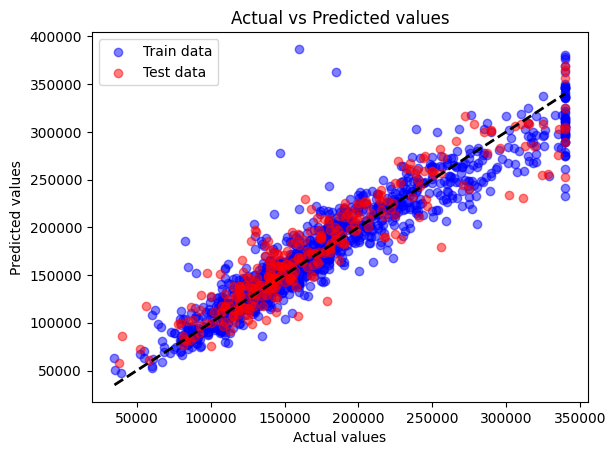

In [36]:
# График для тренировочных данных
# print(type(prediction_test))
# prediction_test = np.clip(prediction_test, np.min(prediction_train), np.max(prediction_train))

plt.scatter(target_train, train_predict, color='blue', label='Train data', alpha=0.5)
# График для тестовых данных
plt.scatter(target_test, test_predict, color='red', label='Test data', alpha=0.5)

# Линия идеальных предсказаний
plt.plot([min(target_train.min(), target_test.min()), max(target_train.max(), target_test.max())], 
         [min(target_train.min(), target_test.min()), max(target_train.max(), target_test.max())], 
         'k--', lw=2)

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

In [37]:
# Получение признаков и их коэффициентов
features = fitches_train.columns
coefficients = linereg_lasso.coef_

# Создание DataFrame для удобного вывода
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
pd.set_option('display.float_format', lambda x: '%.5f' % x)

lasso_f_imp = feature_importance.sort_values(by=['Coefficient'], ascending=False)

lasso_f_imp

,Feature,Coefficient
63,std_OverallQual TotalBsmtSF,16798.52282
95,std_GrLivArea Bath,11679.27981
39,KitchenQual_Ex,11054.93949
171,std_OverallQual OverallCond TotalBsmtSF,10381.28878
172,std_OverallQual OverallCond GrLivArea,9404.43934
...,...,...
198,std_OverallQual Bath^2,-2948.10852
15,ExterQual_TA,-3057.83374
3,BldgType_Duplex,-3645.21162
43,SaleCondition_Abnorml,-8841.75752


Посмотрите на веса полученной модели. Какой вывод можно сделать?

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [38]:


# Диапазон значений alpha для поиска
# alphas = np.logspace(-4, 300, 100)
alphas = np.arange(0, 15, 0.1)

# Создание модели Lasso
ridge = Ridge(random_state=42)
print(alphas)
# Создание словаря параметров для поиска
param_grid = {'alpha': alphas}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=2, scoring=make_scorer(mean_squared_error, greater_is_better=False), n_jobs=-1)

# Обучение
grid_search.fit(fitches_train, target_train)

# получим оптимального значения alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Оптимальное значение alpha: {best_alpha}")

# Предикты
train_predict = grid_search.predict(fitches_train)
test_predict = grid_search.predict(fitches_test)

# Метрики:
mse_train = mean_squared_error(target_train, train_predict)
mse_test = mean_squared_error(target_test, test_predict)

mae_train = mean_absolute_error(target_train, train_predict)
mae_test = mean_absolute_error(target_test, test_predict)

r2_train = r2_score(target_train, train_predict)
r2_test = r2_score(target_test, test_predict)

# Вывод метрик
print("MSE:")
print(f'MSE (train): {mse_train}')
print(f'MSE (test): {mse_test}')

print("\nMAE:")
print(f'MAE (train): {mae_train}')
print(f'MAE (test): {mae_test}')

print("\nR^2:")
print(f'R^2 (train): {r2_train}')
print(f'R^2 (test): {r2_test}')

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9]
Оптимальное значение alpha: 7.4
MSE:
MSE (train): 444897674.55929965
MSE (test): 594241073.106211

MAE:
MAE (train): 14733.875398133589
MAE (test): 18111.16936004714

R^2:
R^2 (train): 0.9029836514854599
R^2 (test): 0.8586091800433123


In [39]:
linereg_ridge = Lasso(alpha=7.4, random_state=42)

linereg_ridge.fit(fitches_train, target_train)

train_predict = linereg_ridge.predict(fitches_train)
test_predict = linereg_ridge.predict(fitches_test)

# Метрики:
mse_train = mean_squared_error(target_train, train_predict)
mse_test = mean_squared_error(target_test, test_predict)

mae_train = mean_absolute_error(target_train, train_predict)
mae_test = mean_absolute_error(target_test, test_predict)

r2_train = r2_score(target_train, train_predict)
r2_test = r2_score(target_test, test_predict)

# Вывод метрик
print("MSE:")
print(f'MSE (train): {mse_train}')
print(f'MSE (test): {mse_test}')

print("\nMAE:")
print(f'MAE (train): {mae_train}')
print(f'MAE (test): {mae_test}')

print("\nR^2:")
print(f'R^2 (train): {r2_train}')
print(f'R^2 (test): {r2_test}')

MSE:
MSE (train): 414179400.30013895
MSE (test): 657343498.872729

MAE:
MAE (train): 14534.870724944312
MAE (test): 19096.872309966617

R^2:
R^2 (train): 0.9096822138104799
R^2 (test): 0.8435948969111376


/Users/saidplatonov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e+11, tolerance: 5.356e+08
  model = cd_fast.enet_coordinate_descent(


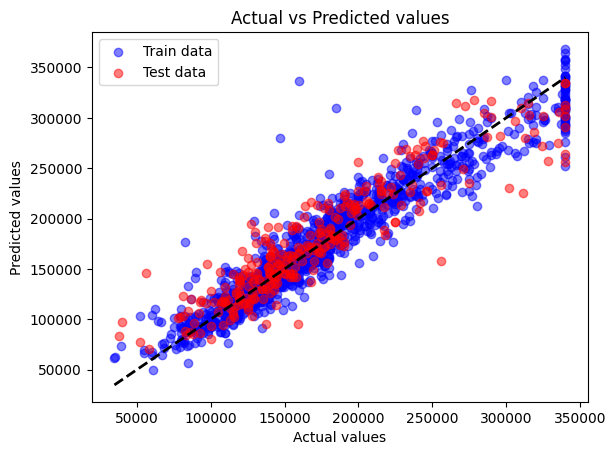

In [40]:
plt.scatter(target_train, train_predict, color='blue', label='Train data', alpha=0.5)
# График для тестовых данных
plt.scatter(target_test, test_predict, color='red', label='Test data', alpha=0.5)

# Линия идеальных предсказаний
plt.plot([min(target_train.min(), target_test.min()), max(target_train.max(), target_test.max())], 
         [min(target_train.min(), target_test.min()), max(target_train.max(), target_test.max())], 
         'k--', lw=2)

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

In [41]:
# Получение признаков и их коэффициентов
features = fitches_train.columns
coefficients = linereg_ridge.coef_

# Создание DataFrame для удобного вывода
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
pd.set_option('display.float_format', lambda x: '%.5f' % x)
feature_importance.sort_values(by=['Coefficient'], ascending=False)

,Feature,Coefficient
115,std_LotArea OverallQual OverallCond,46536.33489
171,std_OverallQual OverallCond TotalBsmtSF,31502.00573
50,std_LotArea OverallQual,27235.59270
147,std_LotArea TotalBsmtSF GarageArea,25990.71230
45,SaleCondition_Alloca,25169.95400
...,...,...
156,std_LotArea GarageArea^2,-24735.74577
27,Heating_Floor,-25282.53948
299,std_TotalBsmtSF Bath GarageArea,-26177.00311
290,std_TotalBsmtSF^2 GrLivArea,-30961.61486


Посмотрите на веса полученной модели. Какой вывод можно сделать?

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

In [42]:
lasso_f_imp[lasso_f_imp['Coefficient'] == 0].tail(3)

,Feature,Coefficient
130,std_LotArea OverallCond YearSold,0.00000
133,std_LotArea YearBuilt TotalBsmtSF,0.00000
123,std_LotArea OverallCond^2,0.00000


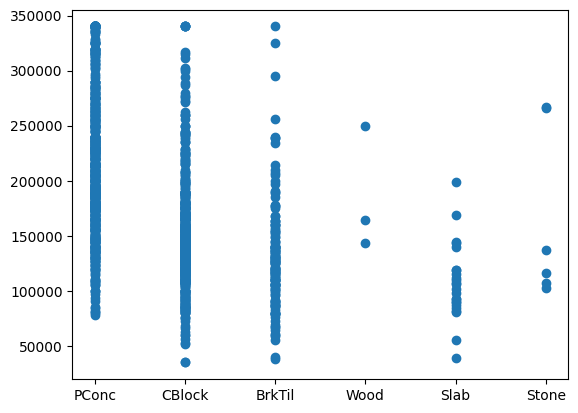

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [43]:
plt.scatter(data['Foundation'], data['SalePrice'])
plt.show()
data['Foundation'].value_counts()

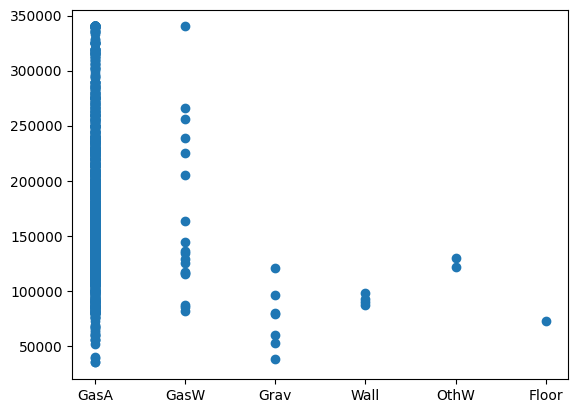

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [44]:
plt.scatter(data['Heating'], data['SalePrice'])
plt.show()
data['Heating'].value_counts()

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 